In [267]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [268]:
data = pd.read_csv('storedata.csv')

In [269]:
data.head()

,Store ID,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,Store age,Clearance space,Competition number,Competition score,Performance
0,1437,9,18526,121,Yes,10,Retail Park,1288374,3,238,16,16,Good
1,1544,8,18569,121,Yes,11,Shopping Centre,1086225,4,384,15,19,Excellent
2,2039,-2,12288,105,No,12,Retail Park,1595638,11,219,13,18,Poor
3,2055,7,17092,117,No,14,High Street,1179395,5,261,15,12,Poor
4,2141,7,11307,103,No,18,Retail Park,1398558,7,200,19,13,Poor


In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 13 columns):
Store ID              134 non-null int64
Staff                 134 non-null int64
Floor Space           134 non-null int64
Window                134 non-null int64
Car park              134 non-null object
Demographic score     134 non-null int64
Location              134 non-null object
40min population      134 non-null int64
Store age             134 non-null int64
Clearance space       134 non-null int64
Competition number    134 non-null int64
Competition score     134 non-null int64
Performance           134 non-null object
dtypes: int64(10), object(3)
memory usage: 13.7+ KB


In [271]:
data.drop(['Window', 'Store ID', 'Clearance space'], inplace=True, axis=1)

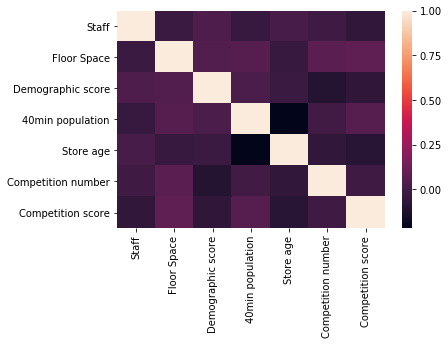

In [272]:
sns.heatmap(data.corr());

In [273]:
data['Car park'] = data['Car park'].map({'Yes':1, 'No':0})

In [274]:
data.head()

,Staff,Floor Space,Car park,Demographic score,Location,40min population,Store age,Competition number,Competition score,Performance
0,9,18526,1,10,Retail Park,1288374,3,16,16,Good
1,8,18569,1,11,Shopping Centre,1086225,4,15,19,Excellent
2,-2,12288,0,12,Retail Park,1595638,11,13,18,Poor
3,7,17092,0,14,High Street,1179395,5,15,12,Poor
4,7,11307,0,18,Retail Park,1398558,7,19,13,Poor


In [275]:
data.drop([2], inplace=True, axis=0)

In [276]:
data.head()

,Staff,Floor Space,Car park,Demographic score,Location,40min population,Store age,Competition number,Competition score,Performance
0,9,18526,1,10,Retail Park,1288374,3,16,16,Good
1,8,18569,1,11,Shopping Centre,1086225,4,15,19,Excellent
3,7,17092,0,14,High Street,1179395,5,15,12,Poor
4,7,11307,0,18,Retail Park,1398558,7,19,13,Poor
5,7,17888,1,19,Retail Park,1614716,2,17,11,Good


In [277]:
data['Location'].unique()

array(['Retail Park', 'Shopping Centre', 'High Street', 'Village'],
      dtype=object)

In [278]:
cat_columns = ['Location']
data = pd.get_dummies(data, prefix_sep="_", columns=cat_columns)

In [279]:
data.head()

,Staff,Floor Space,Car park,Demographic score,40min population,Store age,Competition number,Competition score,Performance,Location_High Street,Location_Retail Park,Location_Shopping Centre,Location_Village
0,9,18526,1,10,1288374,3,16,16,Good,0,1,0,0
1,8,18569,1,11,1086225,4,15,19,Excellent,0,0,1,0
3,7,17092,0,14,1179395,5,15,12,Poor,1,0,0,0
4,7,11307,0,18,1398558,7,19,13,Poor,0,1,0,0
5,7,17888,1,19,1614716,2,17,11,Good,0,1,0,0


In [117]:
data['Performance'] = data['Performance'].map({'Excellent':0, 'Good':1, 'Reasonable':2, 'Poor':3})

In [118]:
data['Performance'].unique()

array([1, 0, 3, 2])

In [138]:
y = data['Performance'].astype('int')

In [139]:
X = data.drop('Performance', axis=1)

In [140]:
y.shape, X.shape

((133,), (133, 12))

In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 133
Data columns (total 12 columns):
Staff                        133 non-null int64
Floor Space                  133 non-null int64
Car park                     133 non-null int64
Demographic score            133 non-null int64
40min population             133 non-null int64
Store age                    133 non-null int64
Competition number           133 non-null int64
Competition score            133 non-null int64
Location__High Street        133 non-null uint8
Location__Retail Park        133 non-null uint8
Location__Shopping Centre    133 non-null uint8
Location__Village            133 non-null uint8
dtypes: int64(8), uint8(4)
memory usage: 9.9 KB


In [142]:
from sklearn.model_selection import train_test_split, cross_val_score

In [170]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [171]:
X_train.shape, X_valid.shape

((93, 12), (40, 12))

In [172]:
first_tree = DecisionTreeClassifier(random_state=17)

In [173]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=12))

0.4403439153439153

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
first_knn = KNeighborsClassifier()

In [176]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=6))

0.36786073403720465

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
first_logit = LogisticRegression()

In [186]:
np.mean(cross_val_score(first_logit, X_train, y_train, cv = 11))

0.30901875901875897

# Searching the best deep tree

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features':[.5, .7, 1]}

In [199]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [200]:
%%time
tree_grid.fit(X_train, y_train);

CPU times: user 276 ms, sys: 63.7 ms, total: 340 ms
Wall time: 2.76 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': [0.5, 0.7, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [193]:
tree_grid.best_score_, tree_grid.best_params_

(0.44086021505376344, {'max_depth': 5, 'max_features': 0.5})

In [220]:
knn_params = {'n_neighbors': range(5,30,1) }

In [221]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=6)

In [222]:
%%time
knn_grid.fit(X_train, y_train);

CPU times: user 763 ms, sys: 8.31 ms, total: 771 ms
Wall time: 776 ms


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(5, 30)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [223]:
knn_grid.best_score_, knn_grid.best_params_

(0.3870967741935484, {'n_neighbors': 8})

In [225]:
tree_valid_pred = tree_grid.predict(X_valid)

In [226]:
from sklearn.metrics import accuracy_score

In [227]:
accuracy_score(y_valid, tree_valid_pred)

0.35

In [228]:
from sklearn.metrics import confusion_matrix

In [229]:
confusion_matrix(y_valid, tree_valid_pred)

array([[6, 0, 1, 0],
       [8, 0, 1, 4],
       [7, 0, 3, 2],
       [2, 0, 1, 5]])

In [235]:
from sklearn.tree import export_graphviz

In [236]:
second_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.425

In [242]:
export_graphviz(second_tree, out_file='storedata.dot',
               feature_names=X.columns, filled=True,)

In [244]:
!ls -l *.dot

-rw-r--r--  1 Alex  staff  1776 Jun 12 15:25 storedata.dot


In [264]:
import pydot
(graph,) = pydot.graph_from_dot_file('storedata.dot')
graph.write_png('storedata.png')
# <img src='filename.png'>  Markdown

<img src='storedata.png'>

In [262]:
from PIL import Image
image = Image.open("storedata.png")
image.show()